# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Bonaventura Isaac Guric]
- **Email:** [bonaventuraisaac52@gmail.com]
- **ID Dicoding:** [bonaventuraisaac]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?
- Pada bulan apa terjadi peningkatan jumlah peminjaman sepeda?
- Apakah ada perbedaan pola pengguna casual dan pengguna terdaftar dalam penggunaan sepeda pada hari libur?


## Import Semua Packages/Library yang Digunakan

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

## Data Wrangling

### Gathering Data

Membuat dataframe df_day dan df_hour

In [204]:
df_day = pd.read_csv('https://raw.githubusercontent.com/tukangtukangtukang/submission/c2fb16fa9480d2ba21fff8d6bfd90e14b02b6abd/data/day.csv')
df_hour = pd.read_csv('https://raw.githubusercontent.com/tukangtukangtukang/submission/c2fb16fa9480d2ba21fff8d6bfd90e14b02b6abd/data/hour.csv')

df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [205]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data yang digunakan terdiri dari dua file yaitu `day.csv` dan `hour.csv`.
- Masing-masing dataset terdiri dari beberapa kolom yang berisi informasi terkait penggunaan sepeda seperti tanggal, temperature, hari, pengguna, dll.


### Assessing Data

Info tentang dataset df_day dan df_hour

In [206]:
buffer_day = io.StringIO()
df_day.info(buf=buffer_day)
info_day = buffer_day.getvalue()

buffer_hour = io.StringIO()
df_hour.info(buf=buffer_hour)
info_hour = buffer_hour.getvalue()

Cetak informasi dataset

In [207]:
print('Info Dataset Day:')
print(info_day)
print('\nInfo Dataset Hour:')
print(info_hour)

Info Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Info Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737

Mengecek duplikasi dan missing values

In [208]:
jumlah_duplikasi_day = df_day.duplicated().sum()
jumlah_duplikasi_hour = df_hour.duplicated().sum()

print(f'\nJumlah duplikasi pada dataframe `df_day`: {jumlah_duplikasi_day}')
print(f'Jumlah duplikasi pada dataframe `df_hour`: {jumlah_duplikasi_hour}')


Jumlah duplikasi pada dataframe `df_day`: 0
Jumlah duplikasi pada dataframe `df_hour`: 0


Statistik deskriptif untuk df_day dan df_hour

In [209]:
print("\nDeskripsi Dataset Day:")
print(df_day.describe())

print("\nDeskripsi Dataset Hour:")
print(df_hour.describe())


Deskripsi Dataset Day:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std

**Insight:**
- Pada dataframe `df_day` dan `df_hour` yang ternyata sudah bersih sehingga tidak terdapat missing value, data duplikat, maupun inaccurate value.
- Pada dataframe `df_day` dan `df_hour` terdapat kolom `dteday` yang bertipe data `object` yang perlu diubah menjadi `datetime` agar lebih akurat.


### Cleaning Data

Mengubah tipe data kolom `dteday` menjadi datetime

In [210]:
dteday_columns = ["dteday"]

for column in dteday_columns:
    df_day[column] = pd.to_datetime(df_day[column])
    df_hour[column] = pd.to_datetime(df_hour[column])

Menampilkan info dataset setelah mengubah tipe data

In [211]:
buffer_day = io.StringIO()
df_day.info(buf=buffer_day)
info_day = buffer_day.getvalue()

buffer_hour = io.StringIO()
df_hour.info(buf=buffer_hour)
info_hour = buffer_hour.getvalue()

print("Info Dataset Day (Setelah Mengubah Tipe Data dteday):")
print(info_day)
print("\nInfo Dataset Hour (Setelah Mengubah Tipe Data dteday):")
print(info_hour)

Info Dataset Day (Setelah Mengubah Tipe Data dteday):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-

Mengubah kolom `season` dengan mapping ke nama musim

In [212]:
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

df_day['season'] = df_day['season'].replace(season_mapping)
df_hour['season'] = df_hour['season'].replace(season_mapping)

Menampilkan 5 baris pertama dari df_day dan df_hour setelah pengubahan season

In [213]:
print("\nData dari day.csv (Setelah Mengubah Kolom Season):")
print(df_day[['dteday', 'season']].head())

print("\nData dari hour.csv (Setelah Mengubah Kolom Season):")
print(df_hour[['dteday', 'season']].head())


Data dari day.csv (Setelah Mengubah Kolom Season):
      dteday  season
0 2011-01-01  Spring
1 2011-01-02  Spring
2 2011-01-03  Spring
3 2011-01-04  Spring
4 2011-01-05  Spring

Data dari hour.csv (Setelah Mengubah Kolom Season):
      dteday  season
0 2011-01-01  Spring
1 2011-01-01  Spring
2 2011-01-01  Spring
3 2011-01-01  Spring
4 2011-01-01  Spring


**Insight:**
- Kolom dteday berhasil diubah menjadi format datetime, sehingga mempermudah proses pengelompokan data berdasarkan tanggal dan waktu.
- Kolom season yang sebelumnya berisi angka 1-4 diubah menjadi kategori seperti 'Spring', 'Summer', 'Fall', dan 'Winter' agar lebih mudah dipahami.


## Exploratory Data Analysis (EDA)

### Explore ...

1. Pengaruh Musim terhadap Jumlah Peminjaman Sepeda

In [214]:
print("# 1. Pengaruh Musim terhadap Jumlah Peminjaman Sepeda")
season_analysis = df_day.groupby('season')['cnt'].sum().reset_index()
print(season_analysis)

# 1. Pengaruh Musim terhadap Jumlah Peminjaman Sepeda
   season      cnt
0    Fall  1061129
1  Spring   471348
2  Summer   918589
3  Winter   841613


2. Bulan dengan Peningkatan Jumlah Peminjaman

In [215]:
print("\n# 2. Jumlah Peminjaman Sepeda per Bulan")
monthly_analysis = df_day.groupby('mnth')['cnt'].sum().reset_index()
monthly_analysis['month_name'] = monthly_analysis['mnth'].apply(lambda x: pd.to_datetime(f'2011-{x}-01').strftime('%B'))
print(monthly_analysis[['month_name', 'cnt']])


# 2. Jumlah Peminjaman Sepeda per Bulan
   month_name     cnt
0     January  134933
1    February  151352
2       March  228920
3       April  269094
4         May  331686
5        June  346342
6        July  344948
7      August  351194
8   September  345991
9     October  322352
10   November  254831
11   December  211036


3. Perbedaan Pola Pengguna Casual dan Terdaftar pada Hari Libur

In [216]:
print("\n# 3. Perbedaan Pola Pengguna Casual dan Terdaftar pada Hari Libur")
holiday_analysis = df_day[df_day['holiday'] == 1]
user_pattern = holiday_analysis[['casual', 'registered']].sum().reset_index()
user_pattern.columns = ['User Type', 'Total Count']  # Memberi nama kolom yang lebih jelas
print(user_pattern)


# 3. Perbedaan Pola Pengguna Casual dan Terdaftar pada Hari Libur
    User Type  Total Count
0      casual        22359
1  registered        56076


**Insight:**
- Musim Gugur mencatat jumlah peminjaman tertinggi dengan 1.061.129 peminjaman, menunjukkan bahwa pengguna sepeda lebih aktif saat cuaca cenderung nyaman dan stabil.
- Peningkatan peminjaman sepeda terjadi secara signifikan dari Maret hingga Agustus, dengan puncaknya mencapai 351.194 pada bulan Agustus, yang mengindikasikan minat pengguna terhadap aktivitas luar ruangan saat cuaca lebih baik.
- Pada hari libur, pengguna terdaftar (56.076) secara signifikan lebih banyak memanfaatkan layanan sepeda dibandingkan dengan pengguna kasual (22.359), menunjukkan bahwa layanan ini lebih banyak digunakan untuk keperluan komuter dibandingkan rekreasi.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah peminjaman sepeda?

Membaca dataset

In [217]:
df_day = pd.read_csv('https://raw.githubusercontent.com/tukangtukangtukang/submission/c2fb16fa9480d2ba21fff8d6bfd90e14b02b6abd/data/day.csv')

Mengonversi kolom 'season' menjadi kategori yang lebih mudah dipahami

In [218]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_map)

Menghitung total peminjaman sepeda per musim

In [219]:
seasonal_data = df_day.groupby('season')['cnt'].sum().reset_index()

Menampilkan data seasonal_data untuk memastikan nilainya

In [220]:
print("Data peminjaman sepeda per musim:")
print(seasonal_data)

Data peminjaman sepeda per musim:
   season      cnt
0    Fall  1061129
1  Spring   471348
2  Summer   918589
3  Winter   841613


Membuat visualisasi

<ipython-input-221-606b23e68a3c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_data, x='season', y='cnt', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

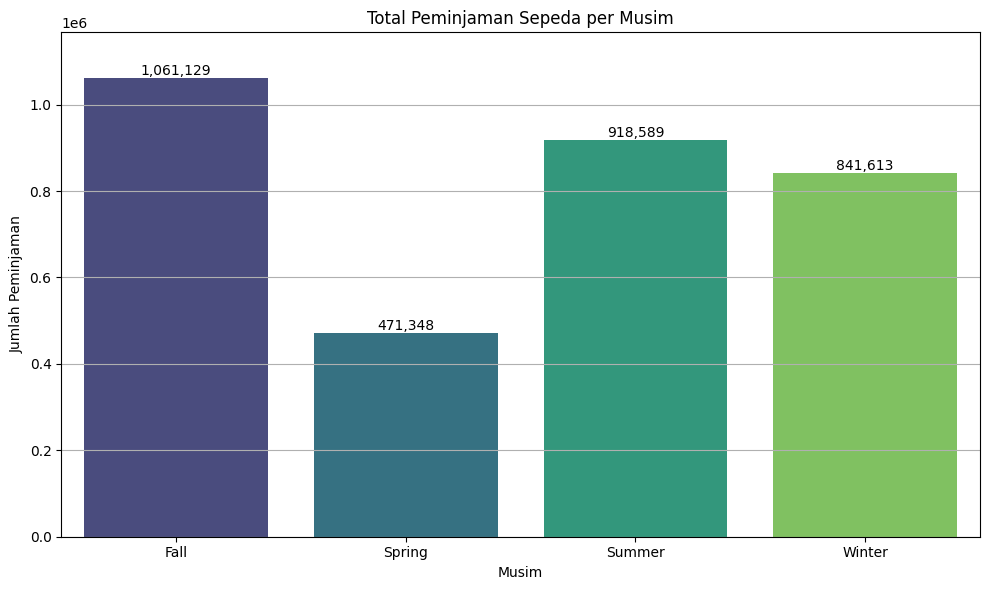

In [221]:
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data, x='season', y='cnt', palette='viridis')
plt.title('Total Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.grid(axis='y')

# Menambahkan label nilai di atas setiap bar
for i, v in enumerate(seasonal_data['cnt']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

# Mengatur skala y-axis agar dimulai dari 0
plt.ylim(0, max(seasonal_data['cnt']) * 1.1)

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

### Pertanyaan 2: Pada bulan apa terjadi peningkatan jumlah peminjaman sepeda?

Mengelompokkan data berdasarkan bulan

In [222]:
monthly_analysis = df_day.groupby('mnth')['cnt'].sum().reset_index()
monthly_analysis['month_name'] = monthly_analysis['mnth'].apply(lambda x: pd.to_datetime(f'2011-{x}-01').strftime('%B'))

Membuat visualisasi

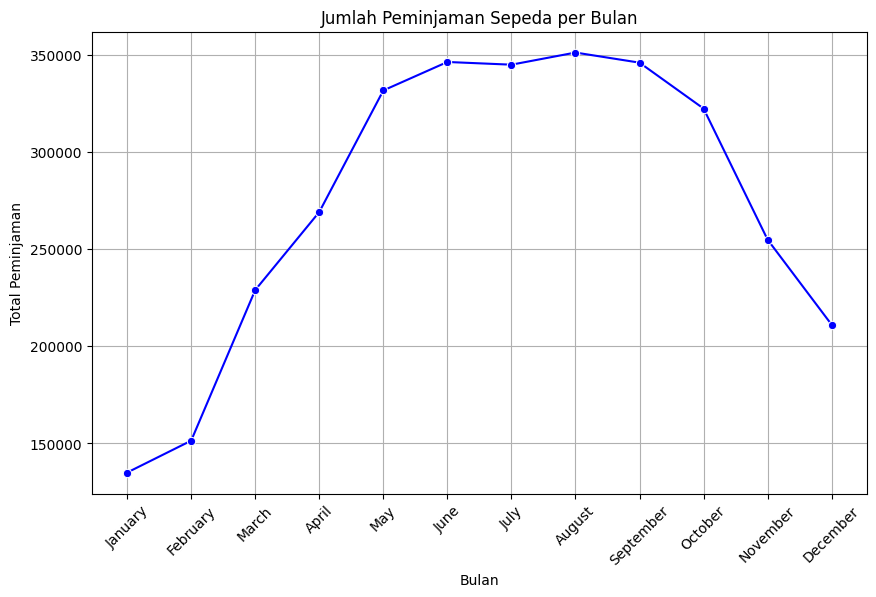

In [223]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_analysis, x='month_name', y='cnt', marker='o', color='blue')
plt.title('Jumlah Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Insight:**
- xxx
- xxx

### Pertanyaan 3: Apakah ada perbedaan pola pengguna casual dan pengguna terdaftar dalam penggunaan sepeda pada hari kerja / hari libur?

Menambahkan kolom baru 'type' untuk membedakan pengguna casual dan registered

In [224]:
hour_df_melt = df_hour.melt(id_vars=['workingday'], value_vars=['casual', 'registered'],
                            var_name='user_type', value_name='count')

Membuat visualisasi

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


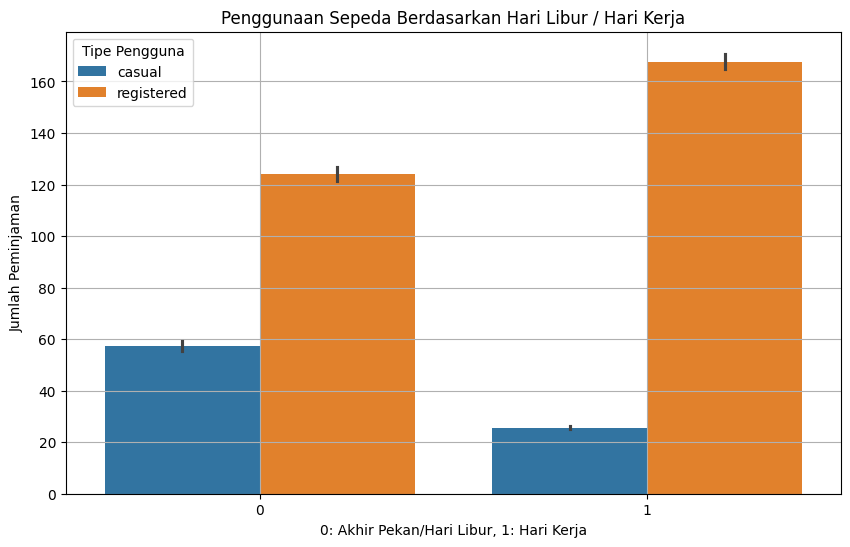

In [225]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_df_melt, x='workingday', y='count', hue='user_type', dodge=True)
plt.title('Penggunaan Sepeda Berdasarkan Hari Libur / Hari Kerja')
plt.xlabel('0: Akhir Pekan/Hari Libur, 1: Hari Kerja')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Tipe Pengguna')
plt.grid()
plt.show()

**Insight:**
- Pada pertanyaan 1, musim gugur adalah periode dengan jumlah peminjaman tertinggi, diikuti oleh musim panas. Musim dingin dan musim semi menunjukkan angka yang lebih rendah, dengan musim semi mencatat jumlah peminjaman terendah. Hal ini menunjukkan bahwa pengguna sepeda lebih cenderung bersepeda dalam cuaca yang nyaman dan stabil.
- Pada pertanyaan 2, peningkatan jumlah peminjaman sepeda mulai terjadi pada bulan Maret dan mencapai puncaknya pada bulan Juli dan Agustus. Hal ini dapat dihubungkan dengan perubahan cuaca dan aktivitas luar ruangan yang meningkat pada periode tersebut.
- Pada pertanyaan 3, terlihat bahwa pengguna terdaftar (registered) secara konsisten menggunakan layanan sepeda lebih banyak daripada pengguna kasual (casual), dengan peningkatan signifikan pada hari kerja, menunjukkan bahwa layanan ini terutama dimanfaatkan untuk komuter harian, sementara pengguna kasual lebih cenderung menggunakannya untuk rekreasi di akhir pekan.


## Analisis Lanjutan (Opsional)

Rata-rata Peminjaman Sepeda berdasarkan Clustering:
                               cluster          cnt
0             Holiday - Weekend - Fall  5707.750000
1           Holiday - Weekend - Spring  1687.857143
2           Holiday - Weekend - Summer  4909.250000
3           Holiday - Weekend - Winter  4025.333333
4         Non-Holiday - Weekend - Fall  5457.075472
5       Non-Holiday - Weekend - Spring  2330.888889
6       Non-Holiday - Weekend - Summer  5160.365385
7       Non-Holiday - Weekend - Winter  4674.549020
8     Non-Holiday - Working Day - Fall  5718.114504
9   Non-Holiday - Working Day - Spring  2780.541667
10  Non-Holiday - Working Day - Summer  4926.664062
11  Non-Holiday - Working Day - Winter  4785.611570


<ipython-input-226-7f96c5d28a3f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clustered_data, x='cluster', y='cnt', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping w

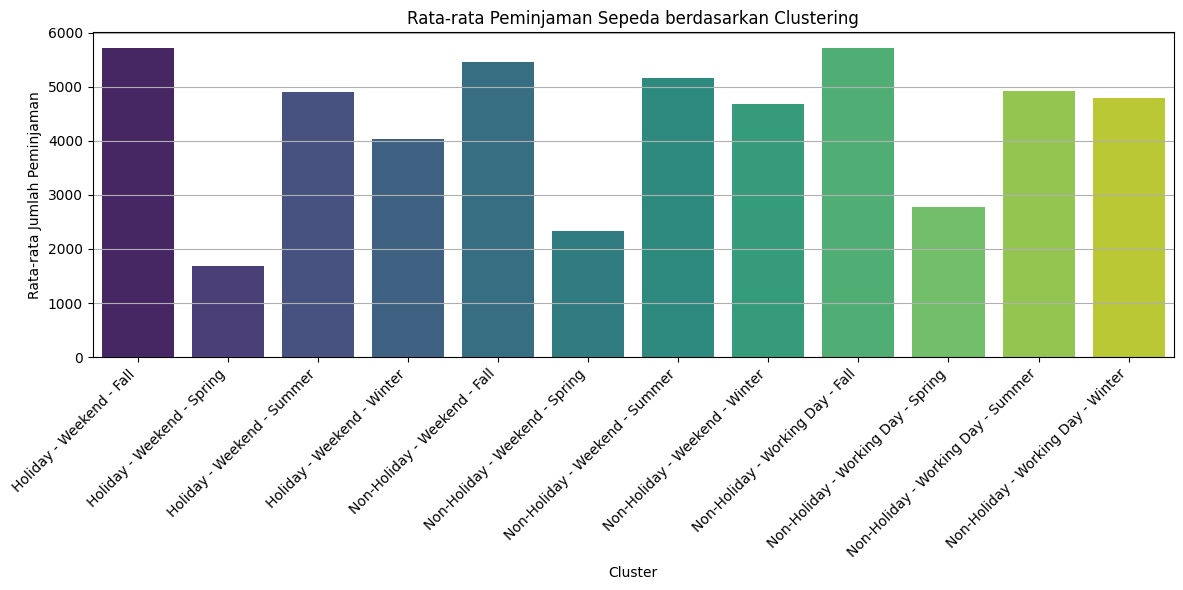

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
df_day = pd.read_csv('https://raw.githubusercontent.com/tukangtukangtukang/submission/main/data/day.csv')

# Mengonversi kolom 'season' menjadi kategori yang lebih mudah dipahami
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(season_map)

# Menentukan kriteria clustering
# Kita akan mengelompokkan berdasarkan 'holiday', 'workingday', dan 'season'
df_day['cluster'] = df_day.apply(
    lambda row: f"{'Holiday' if row['holiday'] == 1 else 'Non-Holiday'} - {'Working Day' if row['workingday'] == 1 else 'Weekend'} - {row['season']}",
    axis=1
)

# Menghitung rata-rata peminjaman berdasarkan cluster
clustered_data = df_day.groupby('cluster')['cnt'].mean().reset_index()

# Menampilkan hasil
print("Rata-rata Peminjaman Sepeda berdasarkan Clustering:")
print(clustered_data)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=clustered_data, x='cluster', y='cnt', palette='viridis')
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Clustering')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Conclusion

- Pertanyaan 1: Musim gugur mencatat jumlah peminjaman tertinggi dibandingkan musim lainnya, diikuti oleh musim panas. Sebaliknya, musim dingin dan musim semi menunjukkan angka yang lebih rendah, dengan musim semi mencatat jumlah peminjaman terendah. Hal ini menunjukkan bahwa pengguna sepeda lebih cenderung untuk bersepeda dalam cuaca yang nyaman dan stabil, di mana musim gugur dan musim panas memberikan kondisi yang lebih baik untuk aktivitas luar ruangan.
- Pertanyaan 2: Peningkatan jumlah peminjaman sepeda mulai terjadi pada bulan Maret, dengan puncaknya tercatat pada bulan Juli dan Agustus. Puncak peminjaman ini dapat dihubungkan dengan perubahan cuaca yang lebih baik dan meningkatnya aktivitas luar ruangan selama musim panas. Oleh karena itu, dapat disimpulkan bahwa faktor cuaca dan ketersediaan waktu luang berkontribusi signifikan terhadap peningkatan peminjaman sepeda.
- Pertanyaan 3:  Analisis menunjukkan bahwa pengguna terdaftar (registered) secara konsisten menggunakan layanan sepeda lebih banyak dibandingkan pengguna kasual (casual). Peningkatan penggunaan ini terlihat lebih signifikan pada hari kerja, yang mengindikasikan bahwa layanan sepeda ini terutama dimanfaatkan untuk keperluan komuter harian. Sebaliknya, pengguna kasual cenderung menggunakan layanan ini untuk rekreasi di akhir pekan. Hal ini menandakan bahwa pengguna terdaftar lebih bergantung pada sepeda sebagai alat transportasi sehari-hari.

